# Partial AUC

In [17]:
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [10]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]  # count the number of unique class
y[7:9]

array([[1, 0, 0],
       [1, 0, 0]])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=410, stratify=y)

In [42]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=410))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [58]:
# Calculate for each class
fpr = {}
tpr = {}
roc_auc = {}
partial_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    partial_auc[i] = round(roc_auc_score(y_test[:, i], y_score[:, i], max_fpr=0.05), 4)

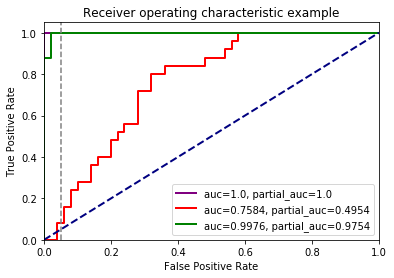

In [59]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='purple',
         lw=lw, label='auc='+str(roc_auc[0])+', partial_auc='+str(partial_auc[0]))
plt.plot(fpr[1], tpr[1], color='r',
         lw=lw, label='auc='+str(roc_auc[1])+', partial_auc='+str(partial_auc[1]))
plt.plot(fpr[2], tpr[2], color='g',
         lw=lw, label='auc='+str(roc_auc[2])+', partial_auc='+str(partial_auc[2]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.axvline(x=0.05, color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## About Partial AUC

* If you want to compare TPR at a certain poit of FPR, you can use partial AUC.
* In the example above, FPR is 0.05, and the partial AUC is the area under the vertical line of TPR for 0.05 FPR in each ROC curve.